# Introduction to NumPy, Pandas, and Python Analytics
Written By Trisha Shrivastava, Supplemented Material by Dr. John Bono


**Welcome to BUFN400's Python Bootcamp! In this notebook, we will cover:**


## Data Processing and Analysis in Python

### What are Pandas and NumPy?

#### A Brief Introduction to NumPy
**NumPy (or Numerical Python)** is a library that specializes in making numerical computations faster (the speed comes from the library being built in C) which allows for easy shape manipulation, descriptive statistics, sorting, and filtering. The main highlight of this library is its ndarray (n-dimensional array).

In [18]:
# import numpy (commonly aliased as np)
import numpy as np

#### A Brief Introduction to Pandas
**Pandas (or panel data)** is a library that specializes in data analysis and processing functionality for data in various forms (i.e. various data types). The highlights of this library are its series (a more advanced ndarray) and its dataframes (think excel spreadsheets in Python). 

In [19]:
# import pandas (commonly aliased as pd)
import pandas as pd

### Array Arithmetic

Arrays, as previously mentioned, are known for their quick computational speed. There are two compelling arithmetic features of arrays **broadcasting** and **comparison** that can be done between arrays of compatible sizes and scalars.

In [4]:
# broadcasting example - scalar
a1 = np.array([x for x in range(10)])
a1 *= 2 #elementwise multiplication of 2
print(a1)

[ 0  2  4  6  8 10 12 14 16 18]


In [5]:
# broadcasting example - compatible arrays (1)
a = np.array([1,2,3])
b = np.array([4,5,6])

print(a+b) #elementwise addition

[5 7 9]


In [ ]:
# broadcasting example - compatible arrays (2)
a = np.array([1,2,3])
c = np.array([[9,8,2],[7,1,5]])
print(c+a)

[[10 10  5]
 [ 8  3  8]]


In [ ]:
# comparison example - scalar
c = np.array([[9,8,2],[7,1,5]])
print(c > 6)

[[ True  True False]
 [ True False False]]


In [ ]:
# comparison example - compatible arrays
b = np.array([4,5,6])
c = np.array([[9,8,2],[7,1,5]])
print(c < b)

[[False False  True]
 [False  True  True]]


In [ ]:
# TRY IT YOURSELF -- create a 2 dimensional ndarray of numbers 1-6
# square all of the values 
# print out the values thats squares are at most 16


Given that Pandas is built off of NumPy, these arithmetic attributes also apply to Series and DataFrames!

### Creating a Dataframe from Collections

Let's first start playing with these libraries by creating a dataset! We are going to start off by creating a dataframe for students' grades. 

To start with, we will create structures to store the students' grades.

Function Notes:
- `np.array(collection)`
- `np.arange(start, stop, step)` - stop not inclusive [start, stop)

In [ ]:
# student a - creating an array from a collection
a = np.array([80, 75, 70, 90, 98])

# student b - creating an array from a range of values 
b = np.arange(80, 105, 5) #this also equals np.array([80,85,90,95,100]) OR np.array(range(80,105,5)) - just faster :)

# student c - creating a list of values
c = [66, 75, 91, 72, 83]

Next, we will add these all together into one dataframe.

Function Notes:
- `pd.DataFrame` - creates a dataframe from a collection; can specify column names, data types, and index

In [ ]:
# merging collections into one dataframe
df = pd.DataFrame({'a': a, 'b' : b, 'c' : c}, index=[1,2,3,4,5])

# display the dataframe
display(df)

,a,b,c
1,80,80,66
2,75,85,75
3,70,90,91
4,90,95,72
5,98,100,83


### Creating a Dataframe from Data Sets (csv/excel)

You can import a dataset from a csv, using `pd.read_csv()`. Using this function, you can determine what columns you want to import in list form (include the attribute usecols=[]) and what datatypes there are in dictionary form (include the attribute dtype={}).

An example anatomy of this function is:

`pd.read_csv('path + filename', usecols = ['col1','col2','col3'], dtype = {'col1': int64, 'col2': float32, 'col3': string})`

### Indexing and Modifying DataFrames

##### Indexing DataFrames

Being able to select data from each column, row, or cell is an important tool for analyzing and modifying data. 

Function Notes:
- `loc()` allows access by [row(s), column(s)] data by index and column name
- `iloc()` allows access by [row(s), column(s)] by positional row and column indices

In [ ]:
# indexing a dataframe column - student b's grades
df['b']

1     80
2     85
3     90
4     95
5    100
Name: b, dtype: int64

In [ ]:
# indexing a dataframe row - first test grades for all students
# the ':' references all of the possible columns
df.loc[1,:]

a    80
b    80
c    66
Name: 1, dtype: int64

In [ ]:
# indexing a cell using .loc
df.loc[1,'c']

66

In [ ]:
# indexing a cell using .iloc
df.iloc[0,2]

66


##### Modifying DataFrames

###### **Changing Values**

Modifying data in a dataframe is as simple as it is with a list. You simply need to set the indexed value equal to the desired value.



**EXERCISE** 
Student b actually received a 88 on the first test. Modify the appropriate cell to reflect the true score.

In [ ]:
# TRY IT YOURSELF - change student b's first test score


# display dataframe with change
display(df)

,a,b,c
1,80,80,66
2,75,85,75
3,70,90,91
4,90,95,72
5,98,100,83


###### **Changing Data Types**

While Python has in-built functions to view data types and wrappers to convert data types of variables, Pandas has in-built functions to convert and view entire series and/or dataframes. These functions produce a copy of the dataframe, so in order to store the changes you've made, you must set it to a variable or use inplace = True.

i.e. df = df.astype(float)

In [ ]:
# view data types of each column
df.dtypes

a    int64
b    int64
c    int64
dtype: object

In [ ]:
# convert ints to floats
df.astype(float)

,a,b,c
1,80.0,80.0,66.0
2,75.0,85.0,75.0
3,70.0,90.0,91.0
4,90.0,95.0,72.0
5,98.0,100.0,83.0


In [ ]:
# convert datatypes based on dictionary mapping
df.astype({'a':'int32','b':'float64','c':'int32'})

,a,b,c
1,80,80.0,66
2,75,85.0,75
3,70,90.0,91
4,90,95.0,72
5,98,100.0,83


###### **Time Data**

Dealing with time can be a bit confusing because of various formatting inconsistencies, so to deal with the complexities of time Python has its own library - datetime! However, converting to datetime is not limited to just this library - NumPy and Pandas have their own capabilities too!

In [6]:
# import statement for datetime
import datetime as dt

In [9]:
# print the current time and date - datetime
x = dt.datetime.now()
print(x)
print(type(x))

2022-08-24 19:57:37.391975
<class 'datetime.datetime'>


In [13]:
# create a datetime obj - np.datetime64
y = np.datetime64('2022-08-24')
print(y)
print(type(y))

2022-08-24
<class 'numpy.datetime64'>


In [17]:
# create a datetime obj - pd.to_datetime
ser1 = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'])
z = pd.to_datetime(ser1)
print(z)

0   2000-03-11
1   2000-03-12
2   2000-03-13
dtype: datetime64[ns]


You can pulls specifics relating to date, such as `year`,`month`,`day`,`hour`,`minute`,`seconds`, and `microseconds`.

In [ ]:
print(x.minute)

14


**Timedelta**

Timedelta is a portion of the datetime library that calculates the sum/difference of two different points in time.

*Note: When you have a negative time difference, you can use the `abs()` function in order to calculate elapsed time.

You can do this with all datetime libraries.

In [ ]:
# first day of class - datetime(year,month,day,hour,minute,second,microsecond)
y = dt.datetime(2022,8,29,14)
print(y)

2022-08-29 14:00:00


In [ ]:
# calculate the difference between now and the first day of class
d1 = y-x
print(d1)
print(type(d1))

7 days, 12:45:33.720546
<class 'datetime.timedelta'>


In [21]:
#displaying np.datetime64 timedelta functionality
np.datetime64('2022-08-24') - np.datetime64('2022-05-05')

numpy.timedelta64(111,'D')

###### Converting to and from Strings

An important functionality of the datetime library is its ability to convert strings to datetime objects and datetime objects to strings. This is primarily done by two functions in datetime:
- `strftime()`: converts datetime object to string
- `strptime()`: converts string to datetime object

While there are library specific functions to convert NumPy and Pandas datetime objects to strings, the inbuilt datetime functions allows for greater flexibility in how your data is displayed.

Helpful guide to strftime()/strptime() shortcuts:
- `%a` - shortened version of weekday (i.e. Wed)
- `%A` - long version of weekday (i.e. Wednesday)
- `%d` - day of the month in number form (i.e. 30)
- `%b` - shortened name of month (i.e. Aug)
- `%B` - long version of month (i.e. August)
- `%m` - month in number form (i.e. 9)
- `%y` - year in shortened form, without century (i.e. 22)
- `%Y` - year in full form (i.e. 2022)
- `%H` - hour in military time (00 - 23)
- `%I` - hour in analog (00 - 12)
- `%p` - AM/PM
- `%M` - minute (00 - 59)
- `%S` - second (00 - 59)
- `%f` - microsecond

In [ ]:
# convert datetime object to string
y = y.strftime('%A %B %d, %Y %I:%M %p')
print(y)
print(type(y))

Monday August 29, 2022 02:00 PM
<class 'str'>


In [ ]:
# convert string to datetime object
y = dt.datetime.strptime(y,'%A %B %d, %Y %I:%M %p')
print(y)
print(type(y))

2022-08-29 14:00:00
<class 'datetime.datetime'>


**EXERCISE** Calculate the difference of now versus your birthday. Print out the result.

In [ ]:
# EXERCISE -- calculate the difference of now versus your birthday


###### **Adding Columns to DataFrame**

Adding columns to a dataframe is as simple as naming the new column and setting it equal to a collection.

In [ ]:
# create a new column from an ndarray
df['d'] = np.array([79,83,99,90,76])

In [ ]:
display(df)

,a,b,c,d
1,80,80,66,79
2,75,85,75,83
3,70,90,91,99
4,90,95,72,90
5,98,100,83,76


###### **Dropping Columns from DataFrame**

To drop a column, you need to use the `df.drop()` function and specify that the axis=1. To ensure that your dataframe keeps the change that you made you either want to set it to a variable or use inplace = True.

In [ ]:
# this function creates a shallow copy of the dataframe where b is removed
df.drop('b', axis=1)

,a,c,d
1,80,66,79
2,75,75,83
3,70,91,99
4,90,72,90
5,98,83,76


###### **Merging DataFrames Together**

There are two ways to merge data with Pandas:

- `pd.concat()` - stack additional data
- `df.merge()` - database-style merge

The type of merge you use depends upon the data that you're merging. 

If you have rows or columns that align, then `pd.concat()` is the best function to use because it stacks the data together.

If you have datasets with a common key or value or index, then `pd.merge()` is the best function to use to achieve that relation.


In [ ]:
# data sets to merge
df_2 = pd.DataFrame({'e': [63,84,76,28,81], 'f':[67,80,73,66,89]}, index=[1,2,3,4,5])

df_3 = pd.DataFrame({'a':100,'b': 100, 'c': 100, 'd': 100, 'e': 100, 'f': 100}, index=[6])

In [ ]:
# inner join - index is the common key
df_final = df.merge(df_2,left_index=True,right_index=True)
display(df_final)

,a,b,c,d,e,f
1,80,80,66,79,63,67
2,75,85,75,83,84,80
3,70,90,91,99,76,73
4,90,95,72,90,28,66
5,98,100,83,76,81,89


In [ ]:
# stacking on additional data to the bottom of the data frame
df_final = pd.concat([df_final,df_3])
display(df_final)

,a,b,c,d,e,f
1,80,80,66,79,63,67
2,75,85,75,83,84,80
3,70,90,91,99,76,73
4,90,95,72,90,28,66
5,98,100,83,76,81,89
6,100,100,100,100,100,100


###### **Reshaping DataFrames**

Sometimes data is not in the ideal shape we would like for it to be. There are three main functions to deal with reshaping:

`.T` - transpose dataframe - switch rows and columns

`.pivot()` - converting from long to wide formats

`.melt()` - converting from wide to long formats

In [ ]:
#create employee dataset
emp_data = [['Tom', 20, 19, '07/06/2021'],
       ['Steven', 15, 18, '08/05/2022'],
       ['Gianna', 23, 22, '06/25/2021'],
       ['Karina', 25, 21, '07/01/2021']]

emp = pd.DataFrame(emp_data, columns=['Name','$/Hr','Age','Start Date'], index=[1,2,3,4])
display(emp)

,Name,$/Hr,Age,Start Date
1,Tom,20,19,07/06/2021
2,Steven,15,18,08/05/2022
3,Gianna,23,22,06/25/2021
4,Karina,25,21,07/01/2021


In [ ]:
# displaying T functionality
display(emp.T)

,1,2,3,4
Name,Tom,Steven,Gianna,Karina
$/Hr,20,15,23,25
Age,19,18,22,21
Start Date,07/06/2021,08/05/2022,06/25/2021,07/01/2021


In [ ]:
#create student dataset
stu_data = [['Sam','Bachelors', 21],
            ['Christian', 'Graduated', 22],
            ['Mafu', 'Graduated', 23],
            ['Vivek','Masters', 22],
            ['Keva', 'Bachelors', 19],
            ['Thi', 'Masters', 25]]

stud = pd.DataFrame(stu_data, columns=['A','B','C'])
display(stud)

,A,B,C
0,Sam,Bachelors,21
1,Christian,Graduated,22
2,Mafu,Graduated,23
3,Vivek,Masters,22
4,Keva,Bachelors,19
5,Thi,Masters,25


In [ ]:
# display .pivot() functionality
display(stud.pivot('A','B','C'))
#empty values are filled with NaNs

B,Bachelors,Graduated,Masters
A,,,
Christian,NaN,22.0,NaN
Keva,19.0,NaN,NaN
Mafu,NaN,23.0,NaN
Sam,21.0,NaN,NaN
Thi,NaN,NaN,25.0
Vivek,NaN,NaN,22.0


In [ ]:
#rename the columns
stud.rename(columns={'A':'Name', 'B': 'Status', 'C': 'Age'}, inplace=True)
display(stud)

,Name,Status,Age
0,Sam,Bachelors,21
1,Christian,Graduated,22
2,Mafu,Graduated,23
3,Vivek,Masters,22
4,Keva,Bachelors,19
5,Thi,Masters,25


In [ ]:
# display .melt() functionality
display(stud.melt(id_vars=['Name'], value_vars=['Status']))

,Name,variable,value
0,Sam,Status,Bachelors
1,Christian,Status,Graduated
2,Mafu,Status,Graduated
3,Vivek,Status,Masters
4,Keva,Status,Bachelors
5,Thi,Status,Masters


### Functions and DataFrames

##### **Descriptive Statistics**

Remember mean, median, and mode? Well, those are all examples of descriptive statistics or easy information about the dataset you're looking at. Pandas has inbuilt functions to streamline this process for dataframes - the most useful of which is `df.describe()`.

Let's re-examine our df_final dataframe:

In [ ]:
display(df_final)

In [ ]:
# applying df.describe() to df_final
df_final.describe()

,a,b,c,d,e,f
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,85.500000,93.000000,81.166667,87.833333,72.000000,79.166667
std,12.389512,6.324555,12.703018,10.186592,24.665766,13.347909
min,70.000000,85.000000,66.000000,76.000000,28.000000,66.000000
25%,76.250000,88.500000,72.750000,80.000000,66.250000,68.500000
50%,85.000000,92.500000,79.000000,86.500000,78.500000,76.500000
75%,96.000000,98.750000,89.000000,96.750000,83.250000,86.750000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


You can very easily get each of these statistics by themselves by using ."statistic"(). 

Furthermore, you can specify how to apply these functions:
- `axis=0` means by column, going through each row (default) - think vertical (up -> down)
- `axis=1` means by row, going through each column - think horizontal (left -> right)

These functions output a Series object.

In [ ]:
# compute averages for each student
df_final.mean()

a    85.500000
b    91.666667
c    81.166667
d    87.833333
e    72.000000
f    79.166667
dtype: float64

In [ ]:
# compute averages for each test 
df_final.mean(axis=1)

1     73.833333
2     80.333333
3     83.166667
4     73.500000
5     87.833333
6    100.000000
dtype: float64

##### **GroupBy**

Pandas' GroupBy function mimics SQL's in that it boils down to conducting three processes at once:
- Grouping data according to specified criteria (i.e. category)
- Applying a function to each specified group
- Combining the results into a data structure 

To write a successful GroupBy, you need to have three specifications present:
- A DataFrame or Series
- .groupby method with grouping specifications
- function being applied to each grouping

There are 4 ways to group the observations in a pandas data structure (Series or DataFrame):

1. By a sequence of values that is the same length as the axis being grouped
2. By a DataFrame column name (DataFrame only)**
3. By a dictionary or Series giving a correspondence between the values on the axis being grouped and the group names
4. By the results of a function call invoked on the axis index or the individual labels in the index

** This is the method we will be covering and is the most common practice

In [ ]:
# create a new dataframe
form = pd.DataFrame({'date': ['08/24/2022','08/24/2022','08/24/2022','08/24/2022','08/24/2022','08/24/2022','08/24/2022','08/24/2022','08/24/2022','08/24/2022'],'time': ['Morning', 'Morning', 'Evening', 'Afternoon','Morning','Afternoon','Evening','Evening','Evening','Morning'], 'pandas': [5,5,4,3,2,4,4,1,2,3], 'numpy': [5,4,4,3,2,3,4,4,2,3]})

display(form)

,date,time,pandas,numpy
0,08/24/2022,Morning,5,5
1,08/24/2022,Morning,5,4
2,08/24/2022,Evening,4,4
3,08/24/2022,Afternoon,3,3
4,08/24/2022,Morning,2,2
5,08/24/2022,Afternoon,4,3
6,08/24/2022,Evening,4,4
7,08/24/2022,Evening,1,4
8,08/24/2022,Evening,2,2
9,08/24/2022,Morning,3,3


**--THOUGHT EXERCISE--**

What kinds of groups can we make with this data? What types of functions can we apply to get insight about this data?

In [ ]:
# creating a group for time
# you can also group multiple columns by using a list
grouped = form.groupby(by='time')
grouped

In [ ]:
# let's see the frequency of each group 
grouped.size()

time
Afternoon    2
Evening      4
Morning      4
dtype: int64

In [ ]:
# let's look into one specific group in particular
grouped.get_group('Evening')

,date,time,pandas,numpy
2,08/24/2022,Evening,4,4
6,08/24/2022,Evening,4,4
7,08/24/2022,Evening,1,4
8,08/24/2022,Evening,2,2


**EXERCISE**

What is another way we can get the same dataframe generated above?

In [ ]:
# Enter Answer


**EXERCISE**

Calculate the average expertise level of NumPy and Pandas amongst the time grouping.

In [ ]:
# Enter Answer


##### **Applying Functions to a DataFrame** - df.apply() and df.applymap()

`df.apply()` is the easiest way to apply your own custom function to entire rows and/or columns (this includes lambdas and inbuilt functions!). 

`df.applymap()` applies function to each element in a dataframe.

You can once again specify rows or columns by using 
axis=0 (column) or axis=1 (row) for `df.apply()`.

In [ ]:
# reloading df_final
display(df_final)

In [ ]:
# calculate the percentage weight of each student's test score to the their total points
df_final.apply(lambda x: x/x.sum()*100, axis=0)

,a,b,c,d,e,f
1,15.594542,14.545455,13.552361,14.990512,14.583333,14.105263
2,14.619883,15.454545,15.400411,15.749526,19.444444,16.842105
3,13.645224,16.363636,18.685832,18.785579,17.592593,15.368421
4,17.543860,17.272727,14.784394,17.077799,6.481481,13.894737
5,19.103314,18.181818,17.043121,14.421252,18.750000,18.736842
6,19.493177,18.181818,20.533881,18.975332,23.148148,21.052632


In [ ]:
# make the test scores display as percentages
df_final.applymap(lambda x: f'{x}%')

,a,b,c,d,e,f
1,80%,80%,66%,79%,63%,67%
2,75%,85%,75%,83%,84%,80%
3,70%,90%,91%,99%,76%,73%
4,90%,95%,72%,90%,28%,66%
5,98%,100%,83%,76%,81%,89%
6,100%,100%,100%,100%,100%,100%


##### **Conditional Functions** - np.where()



`np.where()` is a powerful function enables the power to essentially embody a `if...then...else...` in one singular statement. It can be applied to any type of collection.

Here's the anatomy of this function:

np.where(condition, result_if_true, result_if_false)

In [ ]:
# let's flag all the tests that are below a certain score as retake
df_final.apply(lambda x: np.where(x < 65, 'Retake', ' ------- '))

,a,b,c,d,e,f
1,-------,-------,-------,-------,Retake,-------
2,-------,-------,-------,-------,-------,-------
3,-------,-------,-------,-------,-------,-------
4,-------,-------,-------,-------,Retake,-------
5,-------,-------,-------,-------,-------,-------
6,-------,-------,-------,-------,-------,-------


##### **Masking/Filtering**

Masking refers to hiding values based upon a condition. We can do this with dataframes by using `df[condition]` or with arrays by using `arr[condition]`.

In [ ]:
df_final[df_final >= 90]

,a,b,c,d,e,f
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,90.0,91.0,99.0,NaN,NaN
4,90.0,95.0,NaN,90.0,NaN,NaN
5,98.0,100.0,NaN,NaN,NaN,NaN
6,100.0,100.0,100.0,100.0,100.0,100.0


In [ ]:
# returns index where statement is true
print(df_final[df_final['a'] == 100])

     a    b    c    d    e    f
6  100  100  100  100  100  100


## <a name="dataviz"></a>Data Visualization in Python

In order to visualize data, we need to import a package from another library - the pyplot package from matplotlib.

In [ ]:
# import statement
import matplotlib.pyplot as plt

Pyplot's `.plot()` function enables us to draw graphs from a series of points documented in any type of collection.

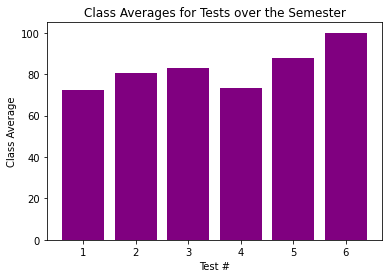

In [ ]:
# create a bar graph 

# make the x-axis the test numbers 
x = [1,2,3,4,5,6]

#make the y-axis the averages for each test
y = df_final.mean(axis=1)

#draw the graph
plt.bar(x,y, color='purple')

#add axes
plt.xlabel('Test #')
plt.ylabel('Class Average')

#add title
plt.title('Class Averages for Tests over the Semester')

#show the graph
plt.show()

While the following graphs are not ideal to visualize this dataset, they are representations of what this library can do in terms of plotting. 

**DO NOT FORGET**: label your axes and title your graphs! Doing this is equivalent to commenting your code - it's crucial to let you know what you're looking at!

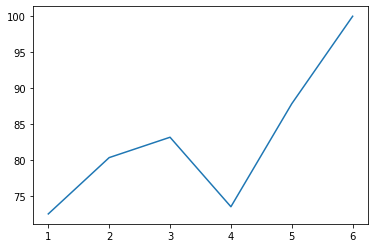

In [ ]:
# create a line graph

plt.plot(x,y)

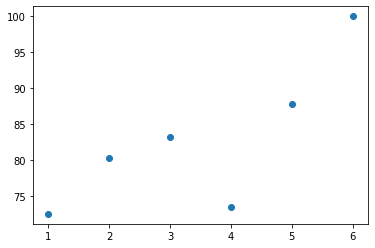

In [ ]:
# create a scatter plot

plt.scatter(x,y)

## <a name="snek"></a>Making Things Pythonic

##### **Lambda Expressions**

Lambda expressions are single-expressioned anonymous functions that can take any series of arguments. They're very useful if you have that one quick thing that you want to do with a function.

In [ ]:
# A Lambda Expression that returns the square of the sum of any two numbers

x = lambda a,b : (a+b)**2
print(x(1,3))

16


##### **List Comprehensions**

List comprehensions help create a new list based on the values of an existing list/range (essentially do the job of a for loop for any iterable).

Here's the anatomy of a list comprehension in written form, but my personal favorite guide to writing them is the image below:

new_list = [output for x in iterable if condition]

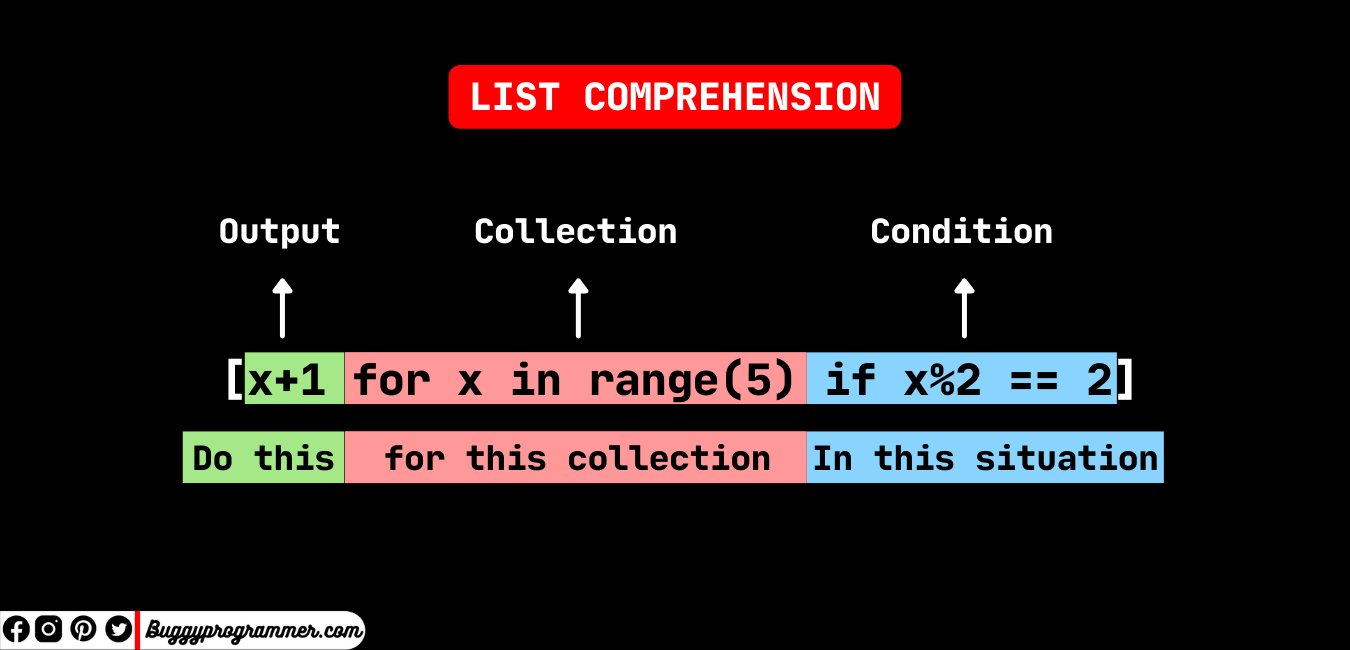

In [ ]:
# A list that records every instance of "python" in coding_langs as "snek"
coding_langs = ['java', 'python', 'c++', 'python', 'cobol', 'javascript', 'c#', 'python', 'sql', 'python']
sneky = ['snek' for x in coding_langs if x == 'python']

print(sneky)

['snek', 'snek', 'snek', 'snek']


You can also do an if, else statement with a list comprehension.

In [ ]:
# A list that changes every instance of "python" in coding_langs as "snek"
coding_langs = ['java', 'python', 'c++', 'python', 'cobol', 'javascript', 'c#', 'python', 'sql', 'python']
sneky = ['snek' if x == 'python' else x for x in coding_langs]

print(sneky)

['java', 'snek', 'c++', 'snek', 'cobol', 'javascript', 'c#', 'snek', 'sql', 'snek']


## Summing it Up

##### **Putting it all together - exercise 1**


a) create a DataFrame from the following dictionary that documents the weekly weather in Bethesda, MD; all highs and lows are in Fahrenheit (data courtesy of wunderground.com)

`{'date':['07/31/2022','08/01/2022','08/02/2022','08/03/2022','08/04/2022','08/05/2022','08/06/2022'], 'high': [85,89,92,91,94,91,88], 'low': [72,73,72,75,74,74,74], 'precipitation (in inches)': [0.00,0.48,0.51,0.00,0.00,0.93,0.00]}`

b) print out the dataframe

c) convert all of the dates in the dataframe to datetime objects

d) analyze the data


> i) What day of the week had the highest high? What day of the week had the lowest high? What was the difference in time between the two? (you should get a timedelta object for this question)

> ii) Take a look at the precipitation - what is the average precipitation for the week?

> iii) Add on the following data:

`pd.Series({'date': '08/07/2022', 'high': 89, 'low': 76, 'precipitation (in inches)': 0.00)`

> iv) Filter the dataframe to see the days with the highs greater than or equal to 90

> v) Graph the highs for each day with the appropriate graph. **BE SURE TO INCLUDE TITLE AND LEGENDS**.









In [ ]:
# Enter Answer - a


In [ ]:
# Enter Answer - b


In [ ]:
# Enter Answer - c


In [ ]:
# Enter Answer - d(i)


In [ ]:
# Enter Answer - d(ii)


In [ ]:
# Enter Answer - d(iii)


In [ ]:
# Enter Answer - d(iv)


In [ ]:
# Enter Answer - d(v)


##### **Working with financial data - exercise 2**

**Download the monthly CRSP dataset**


1.   Navigate to WRDS (https://wrds-www.wharton.upenn.edu/)
2.   Enter the login credentials
3. Click **CRSP** under Subscriptions
4. Find **Treasuries** and then choose **Monthly Time Series**

You should see the following query:
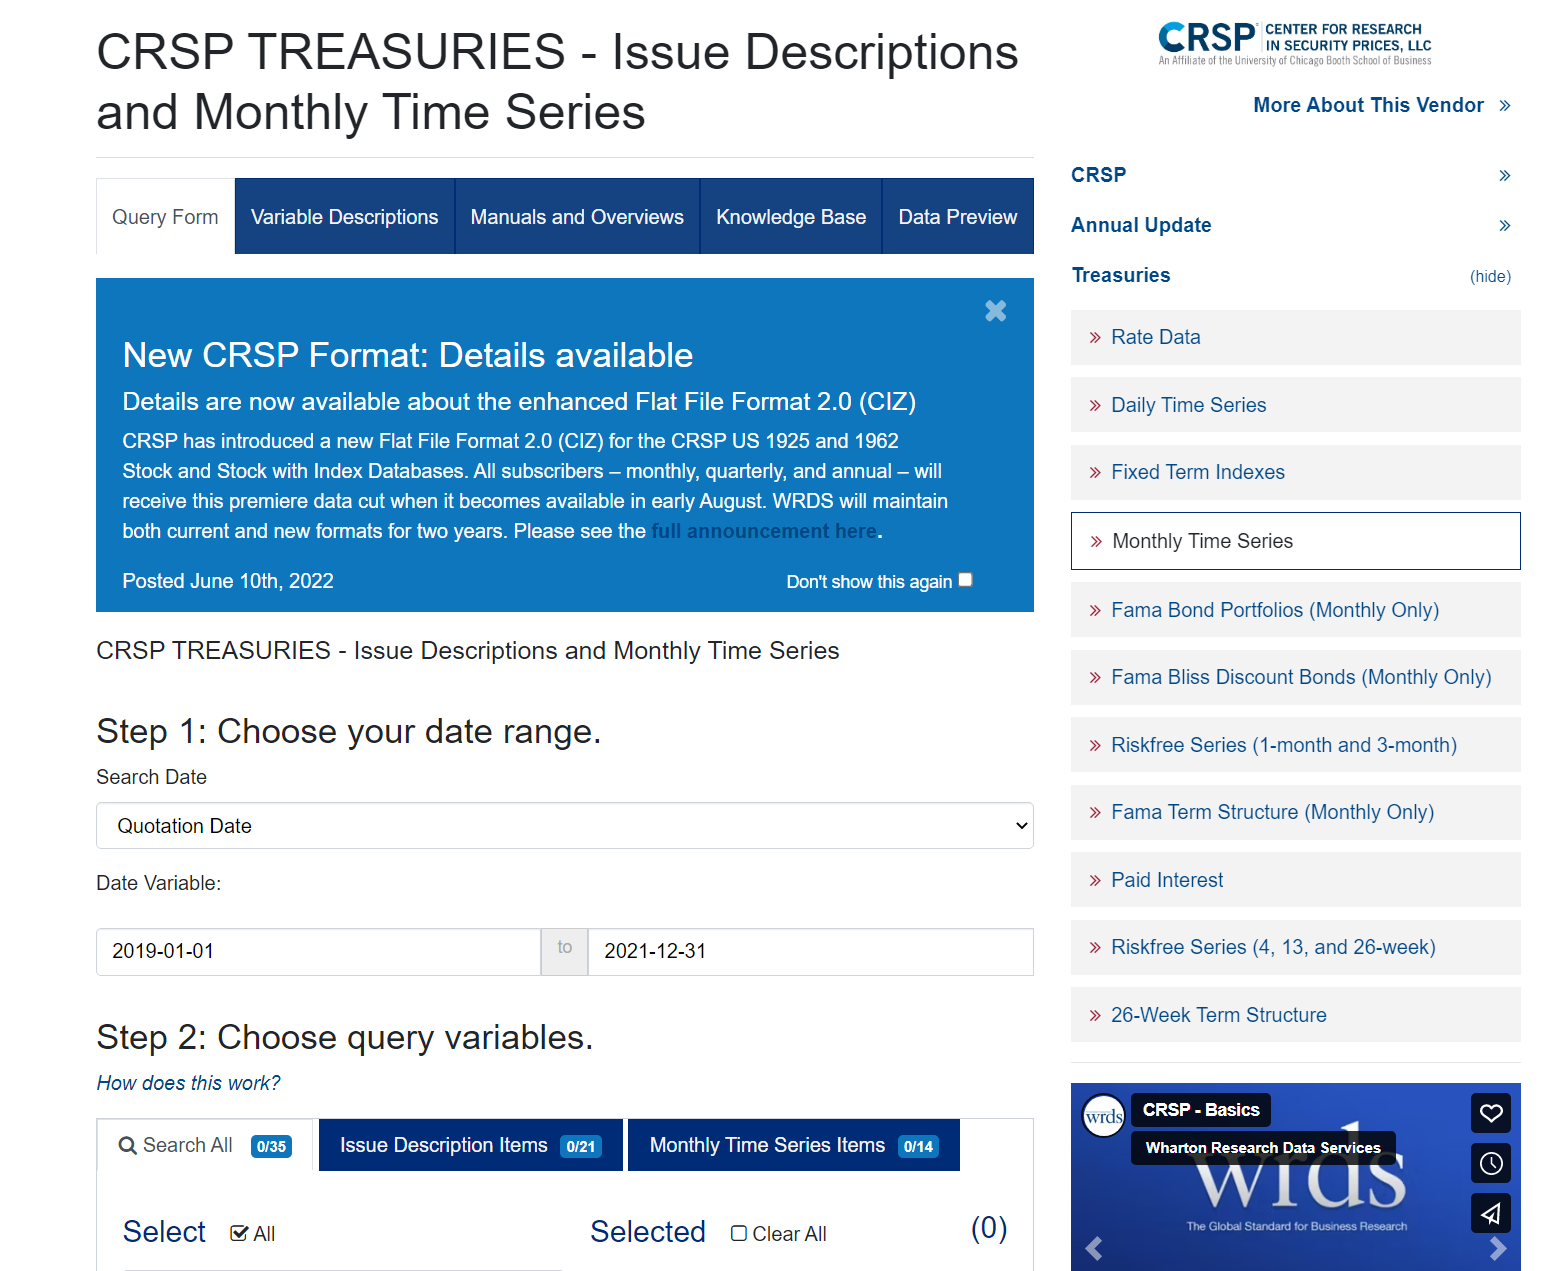



5. This is the following information you want filled out for this query:


> **Search Date**: Quotation Date\
> **Date Variable**: 1916-01-01 to 2021-12-31\
> **Query Variables**: Select all\
> **Output Format:** (*.csv)\
> **Compression Type:** (*.gz)\
> **Date Format:** YYMMDDn8

6. Enter your email address in the box marked **E-Mail Address**
7. Click the link and download!






**Load the dataset**

In [ ]:
# use the pd.read_csv() and read in the file with the appropriate file path
# only load the following columns CRSPID, TCOUPRT, ITYPE, IWHY, and TDATDT


**Data Cleaning**

In [ ]:
# check the data types of all of the columns we read in - are they all appropriate given the variable descriptions? if not, correct them


**Data Analysis**

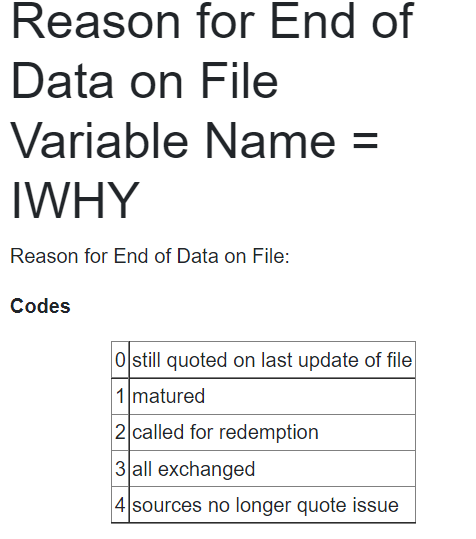

In [ ]:
# using the table above, identify how many bonds fall into each category and which reason is the most frequest for end of data on file (excluding 0)


In [ ]:
# what is the highest coupon rate in the dataset? when was it recorded (weekday, month, day, year)?


In [ ]:
# identify how many treasury bonds are in this dataset. is each instance unique? what additional information might we need to ensure uniqueness? 


In [ ]:
# aggregate the total number of bonds by month - what month has the highest number of bonds? plot the resulting information on an appropriate graph


##### **Additional Python Data Analytics Exercise**
Something you can definitely put on your resume

Download a datset from Kaggle (it could be about anything - just make sure it has a data dictionary)

Clean the data - is there anything inconsistent with the data dictionary? are there values that are kinda funky? - use your best judgement (and record why you did) to keep or remove them

Explore your data - these are the easy statistics (mean, median, mode), are there trends?, if you're feeling spicy throw a linear regression in there and see if there's a strong correlation between any of the x's and the y

Try and tell a story - at the end of the day, data analytics is all about storytelling. you want to be able to tell them why your numbers matter and why you put so much time into making decisions about a dataset that you most likely did not get to create. if you ever find yourself to be presenting to the C-suite about some numbers that you came up with it (first of all, super proud of you and second of all, be confident in your work), make it grippy and make it meaningful. your win will come from a straight-shot, easy-to-understand narrative that a 5 year-old could follow - think less words and more pretty pictures.